In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [26]:
'''
LOAD MNIST DATASET FOR MODEL BUILDING ON DATASETS
'''

(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Convert the record data's into float value
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Standardize the image pixel values between (0-1) for faster conversion
x_test = x_test/255
x_train = x_train/255

## in (R,G,B) image sequencing : each value is in the range of (0-255)
## data standardization is important because several heterogenuous categories of data when put together without proper standardization
## may lead to slower/ no convergence and may affect the outcome in a disprportionate manner



In [27]:
unique_classes = np.unique(y_train)
print(unique_classes)

[0 1 2 3 4 5 6 7 8 9]


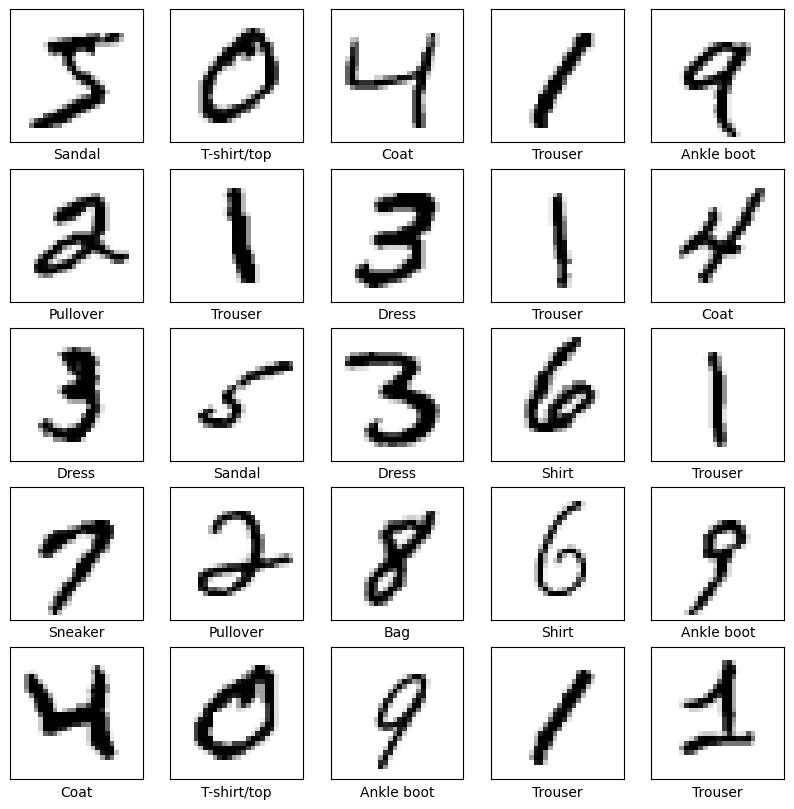

In [28]:
## Here, we are visualizing the encoding of the of each number with their respective output class of the mnist fashion dataset where it corresponds to
## where {0:"T-shirt/top", 1:"Trouser" , 2:"Pullover" , 3:"Dress" , 4:"Coat" , 5:"Sandal" , 6:"Shirt" , 7: "Sneaker" , 8:"Bag" , 9:"Ankle Boot"}
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [29]:
## Model Building stage for the mnist fashion dataset
## input -> output
# (28X28) -> (10)
# Dense : m(1D) -> n(1D)

model = tf.keras.Sequential(
    [
    ## right about the time we are looking to load the data in the ANN we gotta standardize the image dataset
    Flatten(input_shape = (28,28)), ## standardizing the image in 28X28 resolution
    Dense(240, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(10, activation = 'sigmoid') ## since we are looking at a multi-class classification sigmoid activation is the best choice for that
    ## the class with the maximum probabilisitic score based on the sigmoid function can is the class that it will be classified into
    ]
)


In [30]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 240)               188400    
                                                                 
 dense_31 (Dense)            (None, 30)                7230      
                                                                 
 dense_32 (Dense)            (None, 20)                620       
                                                                 
 dense_33 (Dense)            (None, 10)                210       
                                                                 
Total params: 196460 (767.42 KB)
Trainable params: 196460 (767.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=18,
										batch_size=275,
										validation_split=0.3)

Epoch 1/18
153/153 [==============================] - 2s 6ms/step - loss: 0.6184 - accuracy: 0.8243 - val_loss: 0.2547 - val_accuracy: 0.9254
Epoch 2/18
153/153 [==============================] - 1s 5ms/step - loss: 0.1964 - accuracy: 0.9438 - val_loss: 0.1804 - val_accuracy: 0.9461
Epoch 3/18
153/153 [==============================] - 1s 6ms/step - loss: 0.1320 - accuracy: 0.9614 - val_loss: 0.1595 - val_accuracy: 0.9529
Epoch 4/18
153/153 [==============================] - 1s 7ms/step - loss: 0.1005 - accuracy: 0.9709 - val_loss: 0.1265 - val_accuracy: 0.9638
Epoch 5/18
153/153 [==============================] - 1s 7ms/step - loss: 0.0793 - accuracy: 0.9771 - val_loss: 0.1157 - val_accuracy: 0.9659
Epoch 6/18
153/153 [==============================] - 1s 5ms/step - loss: 0.0620 - accuracy: 0.9815 - val_loss: 0.1124 - val_accuracy: 0.9675
Epoch 7/18
153/153 [==============================] - 1s 5ms/step - loss: 0.0489 - accuracy: 0.9859 - val_loss: 0.1047 - val_accuracy: 0.9702
Epoch 

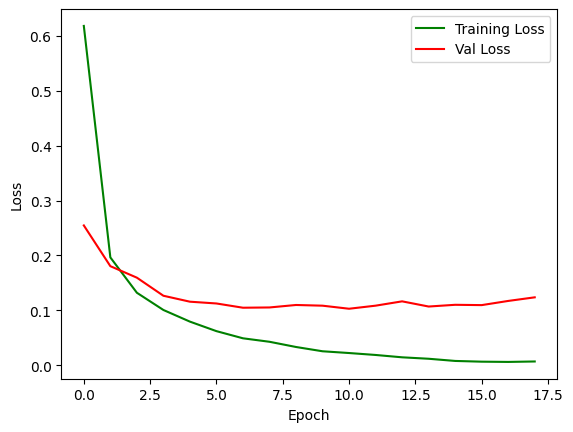

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(history.epoch, loss, 'green', label='Training Loss')
plt.plot(history.epoch, val_loss, 'red', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.09495963156223297, 0.9754999876022339]


In [37]:

# Function to create model with variable layers and neurons
def create_model(num_hidden_layers=1, num_neurons_per_layer=128):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons_per_layer, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Function to train and evaluate model with TensorBoard logging
def train_and_evaluate_model(num_hidden_layers, num_neurons_per_layer, log_dir, x_train, y_train, x_test, y_test):
    model = create_model(num_hidden_layers, num_neurons_per_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, epochs=18, batch_size=275, validation_split=0.3, callbacks=[tensorboard_callback])

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    return test_acc, history

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Setup TensorBoard logging directory
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + current_time

# Ablation study configurations
configurations = [
    {'num_hidden_layers': 1, 'num_neurons_per_layer': 128},
    {'num_hidden_layers': 2, 'num_neurons_per_layer': 128},
    {'num_hidden_layers': 1, 'num_neurons_per_layer': 64},
    {'num_hidden_layers': 2, 'num_neurons_per_layer': 64},
]

# Perform ablation study
results = []
for config in configurations:
    log_subdir = log_dir + f"/layers_{config['num_hidden_layers']}_neurons_{config['num_neurons_per_layer']}"
    test_acc, history = train_and_evaluate_model(config['num_hidden_layers'], config['num_neurons_per_layer'], log_subdir, x_train, y_train, x_test, y_test)
    results.append((config, test_acc))

# Print results
for config, test_acc in results:
    print(f"Config: {config}, Test Accuracy: {test_acc}")

%tensorboard --logdir logs/fit

Epoch 1/18
153/153 [==============================] - 2s 6ms/step - loss: 0.6733 - accuracy: 0.7739 - val_loss: 0.4918 - val_accuracy: 0.8327
Epoch 2/18
153/153 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.8430 - val_loss: 0.4447 - val_accuracy: 0.8477
Epoch 3/18
153/153 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8567 - val_loss: 0.4153 - val_accuracy: 0.8568
Epoch 4/18
153/153 [==============================] - 1s 4ms/step - loss: 0.3865 - accuracy: 0.8644 - val_loss: 0.3839 - val_accuracy: 0.8667
Epoch 5/18
153/153 [==============================] - 1s 4ms/step - loss: 0.3651 - accuracy: 0.8719 - val_loss: 0.3868 - val_accuracy: 0.8652
Epoch 6/18
153/153 [==============================] - 1s 4ms/step - loss: 0.3464 - accuracy: 0.8779 - val_loss: 0.3645 - val_accuracy: 0.8718
Epoch 7/18
153/153 [==============================] - 1s 4ms/step - loss: 0.3326 - accuracy: 0.8828 - val_loss: 0.3563 - val_accuracy: 0.8724
Epoch 

UsageError: Line magic function `%tensorboard` not found.


SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<ipython-input-35-55899ebdce19>, line 1)